#### Home Assignment 4 - SVM

**Task 1 - SVM Quad/Dual Program**

In [188]:
# import Task 1
import numpy as np
import qpsolvers as qps
import matplotlib.pyplot as plt

In [295]:
def plotSVM(X,y,w=None,pieces:int=100, space:float=1,support_vectors:list=None,title:str=None):
    
    # classification to Red and Blue
    red = np.where(y <= 0)
    blue = np.where(y > 0)
    
    # Show the points on the graph
    plt.plot(X[red, 0], X[red, 1],'o', color='red')
    plt.plot(X[blue, 0], X[blue, 1], 'o', color='blue')
    
    # Find Min and Max for define plot sizes
    x_min = np.amin(X[:, 0])
    x_max = np.amax(X[:, 0])
    y_min = np.amin(X[:, 1])
    y_max = np.amax(X[:, 1])
    
    plt.axis([x_min-1, x_max+1, y_min-1, y_max+1]) # set size of axis
    lx = np.linspace(x_min, x_max, pieces)
    
    if(w is not None): # Create SVM visualization
        ly = [(-w[-1] - w[0] * p) / w[1] for p in lx] # Black line seperator
        ly1 = [(-w[-1] - w[0] * p - space) / w[1] for p in lx] # Support line Red
        ly2 = [(-w[-1] - w[0] * p + space) / w[1] for p in lx] # Support line Blue
        # Ploting Vectors
        plt.plot(lx, ly, color='black')
        plt.plot(lx, ly1, "--", color='red')
        plt.plot(lx, ly2, "--", color='blue')
    
    if(support_vectors is not None):
        plt.scatter(X[support_vectors,0], X[support_vectors,1], s=150, linewidth=2, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

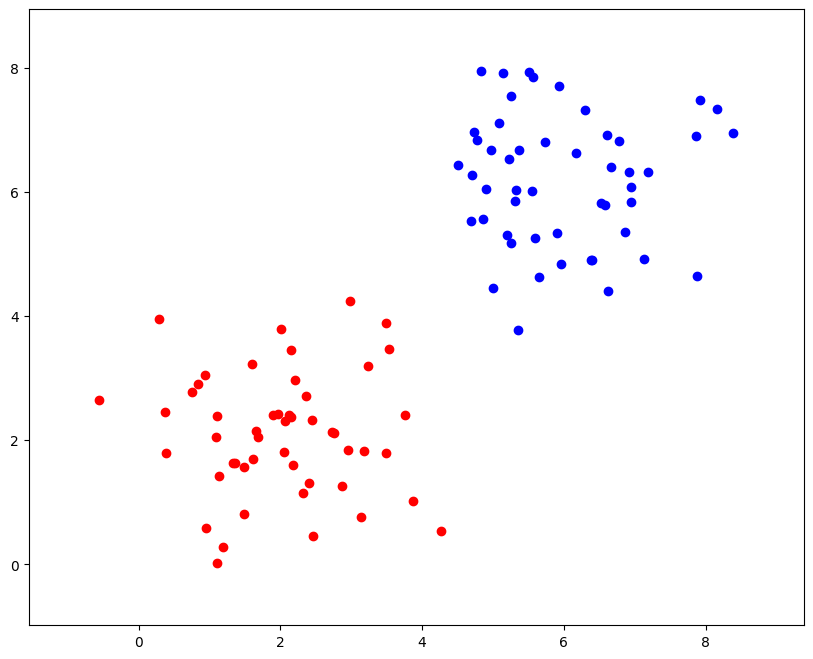

In [296]:
# Loading Database and split
dataset = np.genfromtxt("simple_classification.csv",delimiter=",",skip_header=1)  # read the CSV file "simple_regression.csv" and make it np.array with skipping header
X = dataset[:,:-1] 
y = dataset[:,-1]
y = np.where(y<=0,-1,1)
plotSVM(X,y) # plot the graph of points without SVM

##### Task 1a - Dual Programming SVM

In [190]:
# Task 1a - Quadratic programming
def QuadSVM(X,y):
    X = np.c_[X, np.ones(X.shape[0])]
    P = np.eye(3)
    q = np.zeros(3)
    G = -np.diag(y) @ X
    h = -np.ones(X.shape[0])
    w = qps.solve_qp(P, q, G, h, solver='osqp')
    return w

c:\Users\OmerK\anaconda3\envs\mta\lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
c:\Users\OmerK\anaconda3\envs\mta\lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


vector w from Quadratic programming SVM is [ 1.19553571  0.34700045 -6.52243901]
Plot of Quadratic programming SVM


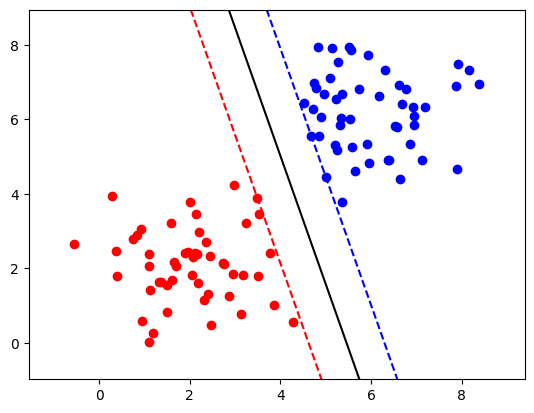

In [192]:
w_quad = QuadSVM(X,y)
print(f"vector w from Quadratic programming SVM is {w_quad}")
print("Plot of Quadratic programming SVM")
plotSVM(X,y,w_quad)

##### Task 1b - Dual Programming SVM

In [208]:
# Task 1b - Dual Programming SVM
def DualSVM(X,y,threshold=1e-05):
    N, n = X.shape
    G = np.diag(y) @ X
    P = G @ G.T
    q = -np.ones(N)
    GG = -np.eye(N)
    h = np.zeros(N)
    A = np.array([y])
    b = np.array([0.])
    
    alpha = alpha = qps.solve_qp(P, q, GG, h, A, b, solver='osqp')
    w = G.T @ alpha
    
    support_vectors_idx = np.where(abs(alpha) > threshold)[0]  # Identify support vectors
    support_vectors = np.where(abs(alpha) > threshold, abs(alpha),0)
    idx = np.argmax(alpha)  # take support vector with highest alpha values
    # Take the indices of the three support vector with the highest alpha value
    bias = y[idx] - np.dot(w.T, X[idx])
    w = np.append(w,bias)
    return w, alpha, support_vectors, support_vectors_idx


Vectors:

Vector w from Dual Program SVM is
[ 1.14881752  0.444889   -6.74060345]

Vector alpha from Dual Program SVM is
[-1.87841173e-04 -7.67772179e-05 -2.02739490e-04  9.71311443e-05
  5.56097326e-05 -5.65101851e-05  8.56975487e-05  8.92079434e-05
  2.24972571e-04 -8.44157163e-04 -4.90796781e-06 -7.08935622e-04
  1.74126374e-05  4.36682265e-06 -4.82787020e-07 -3.41290801e-04
  8.77028613e-05  3.74693854e-05 -3.97715692e-06  6.26350577e-05
  9.26502856e-05  3.04561670e-04 -2.76925941e-04  2.92600535e-04
 -1.89331424e-04  4.00994395e-04 -5.08474022e-04  4.96660931e-04
 -8.69784396e-04 -9.95080346e-05 -6.89637204e-05  5.86290434e-04
  1.45740239e-04 -8.22999320e-05  2.81031781e-05  7.77837832e-01
  1.17391060e-04  8.90325032e-04  1.12793377e-04 -1.76919187e-05
 -1.56457899e-03 -6.69239826e-05  9.11637599e-05  4.57489039e-06
  6.23258394e-05 -2.13108972e-04  7.87340026e-01  1.81374124e-04
 -3.92952091e-04 -4.22467087e-05 -3.57987320e-04  6.22907266e-04
 -2.25842625e-04  1.47022671e-04 

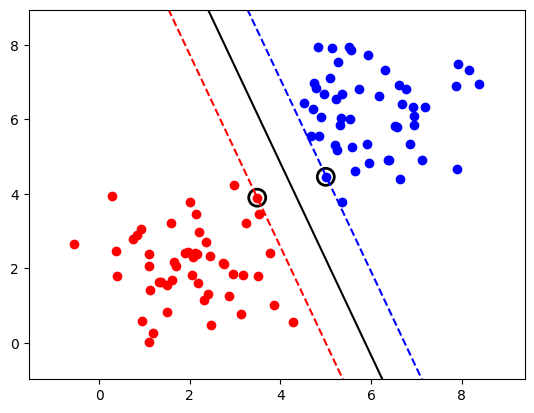

In [209]:
threshold = 0.01
w_dual, alpha, support_vectors, support_vectors_idx = DualSVM(X,y,threshold=threshold)
print("\nVectors:\n")
print(f"Vector w from Dual Program SVM is\n{w_dual}\n")
print(f"Vector alpha from Dual Program SVM is\n{alpha}\n")
print(f"Support Vectors idx from Dual Program SVM is\n{support_vectors}\n")
print("Plot of Quadratic Programming SVM")
plotSVM(X, y, w_dual,support_vectors=support_vectors_idx)

**Task 2 - SVM Dual Program with Kernel**

In [227]:
# import Task 2
import numpy as np
import qpsolvers as qps
import itertools
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
%matplotlib inline

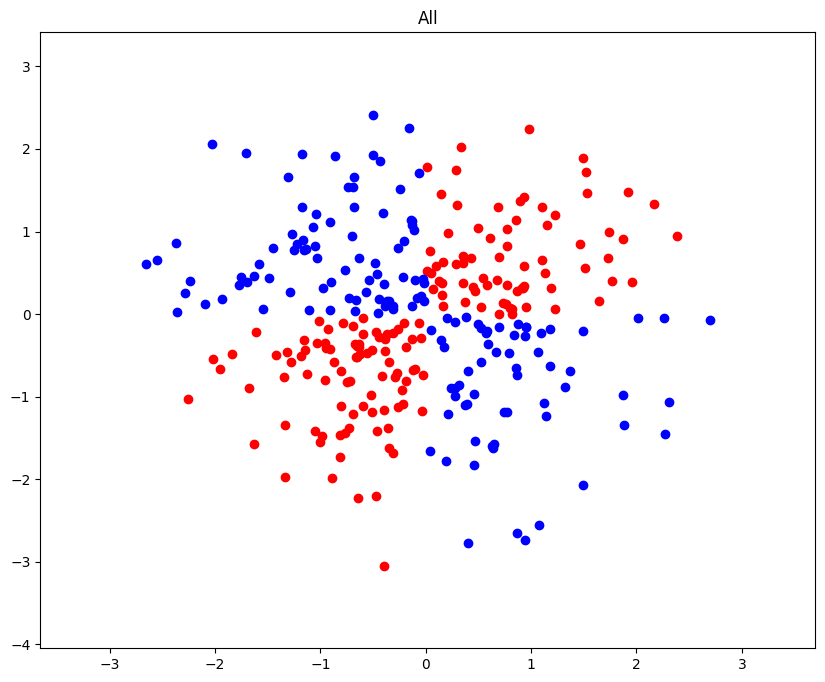

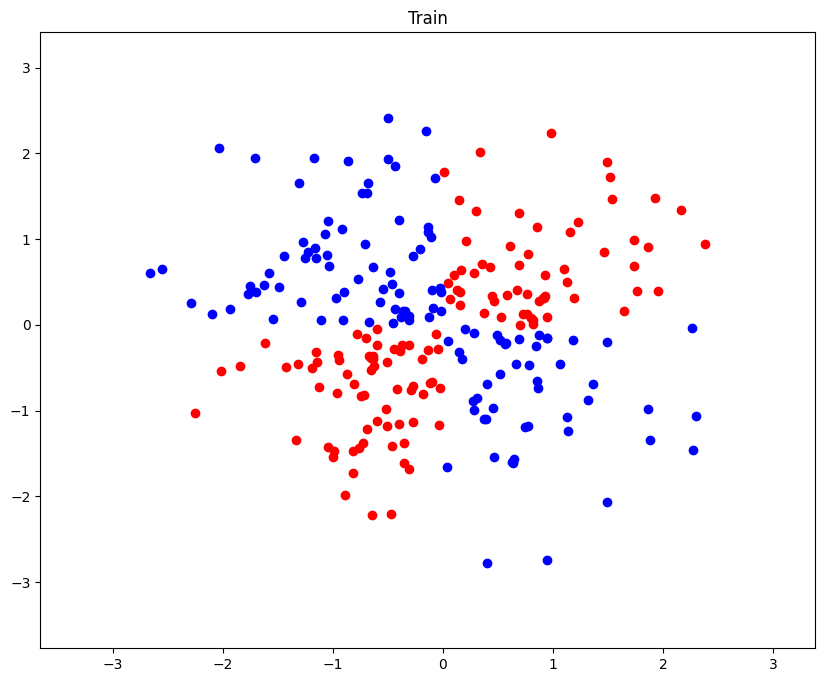

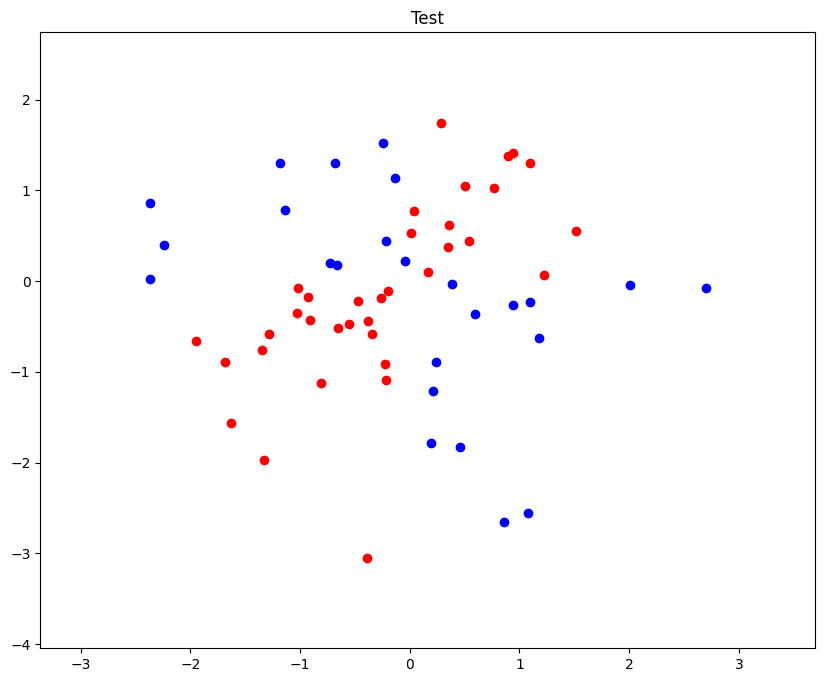

In [297]:
# Loading Database and split
dataset = np.genfromtxt("simple_nonlin_classification.csv",delimiter=",",skip_header=1)  # read the CSV file "simple_regression.csv" and make it np.array with skipping header
X = dataset[:,:-1]
y = dataset[:,-1]
y = np.where(y<=0,-1,1)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2,shuffle=False)
plotSVM(X,y,title='All') # plot the graph of points without SVM
plotSVM(X_trn,y_trn,title='Train')
plotSVM(X_tst,y_tst,title='Test')


In [298]:
def plot_classifier_kernel(alpha, X, y, ker, s_point=None,s_circule=20,threshold=0.01,title:str=None):
    x_min = np.amin(X[:, 0])
    x_max = np.amax(X[:, 0])
    y_min = np.amin(X[:, 1])
    y_max = np.amax(X[:, 1])
    
    plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
    xx = np.linspace(x_min, x_max)
    yy = np.linspace(y_min, y_max)
    
    xx, yy = np.meshgrid(xx, yy)
    
    N, n = X.shape
    z = np.zeros(xx.shape)
    for i, j in itertools.product(range(xx.shape[0]), range(xx.shape[1])):
        z[i, j] = sum([y[k]*alpha[k]*ker(X[k,:], np.array([xx[i,j],yy[i,j]])) for k in range(N)])
    
    plt.rcParams["figure.figsize"] = [10, 8]
                            
    plt.contour(xx, yy, z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--','-', '--'])
    sv = np.argwhere(abs(alpha) > threshold).reshape(-1)
    plt.scatter(X[sv,0], X[sv,1], s=s_circule, linewidth=2, facecolors='none', edgecolors='k')     
    plt.scatter(X[:, 0], X[:, 1], c=y, s=s_point, cmap=matplotlib.colors.ListedColormap(['blue','red']))
    plt.title(title)
    plt.show()

In [294]:
def svm_dual_kernel(X, y, ker, max_iter=1000):
    
    N, n = X.shape
    P = np.empty((N, N))
    for i, j in itertools.product(range(N), range(N)):
        P[i, j] = y[i] * y[j] * ker(X[i,:], X[j,:])
    P = 0.5*(P+P.T)
    P = 0.5*P
    q = -np.ones(N)
    GG = -np.eye(N)
    h = np.zeros(N)

    alpha = qps.solve_qp(P, q, GG, h, solver='osqp', max_iter=max_iter)
    sv = np.argwhere(alpha > 1e-5).reshape(-1)
    support_vectors = X[sv]
    weights = alpha[sv] * y[sv]
    return alpha, weights, support_vectors

def kernel_trick(x, y):
    return (1+x.T @ y)**2 

def sigmoid_kernel(x, y, gamma):
    return np.tanh(gamma * np.dot(x, y))

def polynomial_kernel(X, y, gamma, degree):
    return (gamma * np.dot(X, y)) ** degree

def RBF_kernel(X, y, gamma):
    distance = np.linalg.norm(X - y)  # Euclidean distance between x and y
    return np.exp(-gamma * distance ** 2)


In [299]:
alpha = svm_dual_kernel(X, y, RBF_kernel)
plot_classifier_kernel(alpha, X, y, RBF_kernel, s_point=20,s_circule=150,threshold=0.9,title='RBF Kernel SVM')

TypeError: RBF_kernel() missing 1 required positional argument: 'gamma'

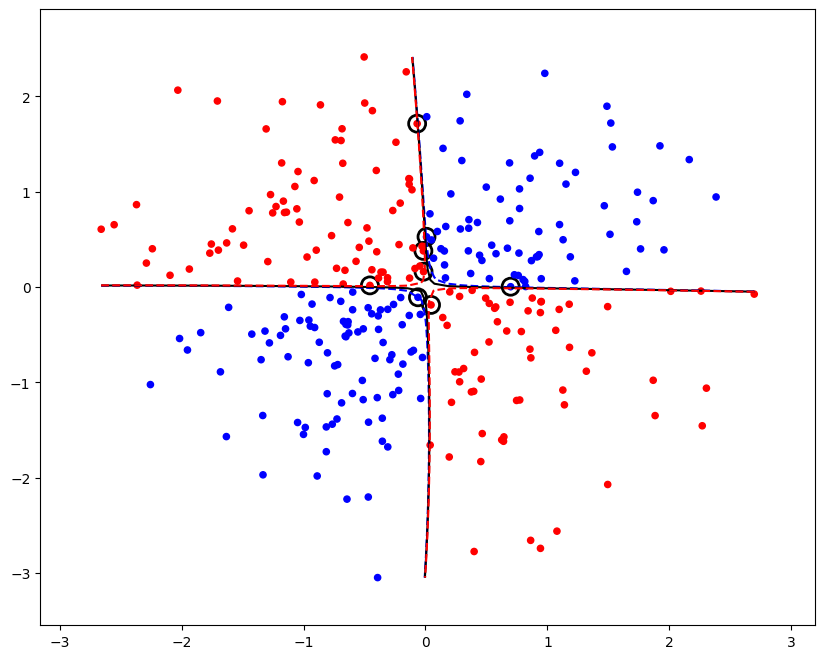

In [287]:
alpha = svm_dual_kernel(X, y, polynomial_kernel)
plot_classifier_kernel(alpha, X, y, polynomial_kernel, s_point=20,s_circule=150,threshold=100,title='Polynomial Kernel SVM')

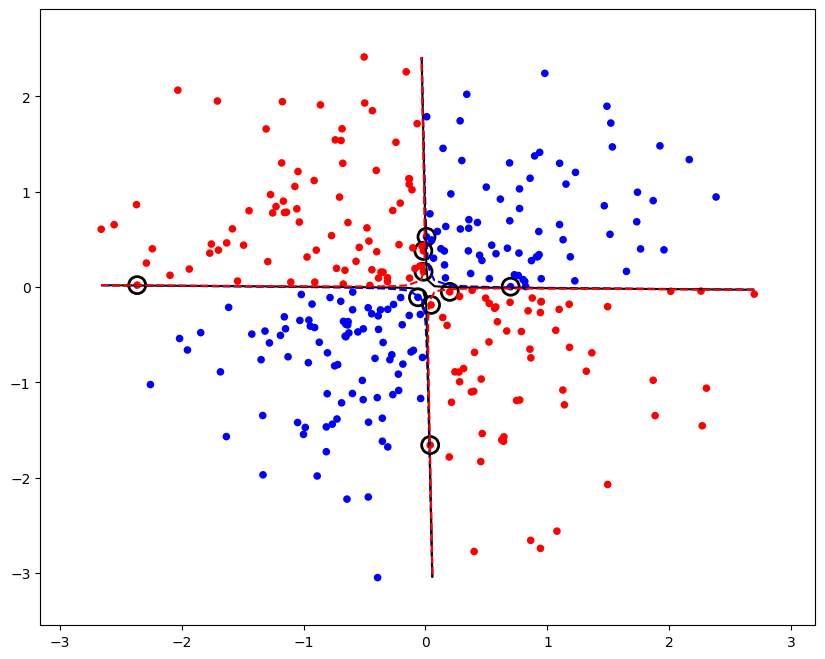

In [271]:
alpha = svm_dual_kernel(X, y, kernel_trick)
plot_classifier_kernel(alpha, X, y, kernel_trick, s_point=20,s_circule=150,threshold=100,title='Kernel Trick SVM')

In [293]:
kernel_names = ['RBF', 'Polynomial', 'Sigmoid']
# Define the values of gamma and degree to test
gammas = [0.1, 1, 10]
degrees = [2, 3, 4]
# Loop over the kernels and test them with different parameter values
scores = {}
for kernel in kernel_names:
    scores[kernel] = []
    if kernel == 'RBF':
        for gamma in gammas:
            for degree in degrees:
                alpha = svm_dual_kernel(X_trn, y_trn, kernel_trick)
                scores[kernel].append(score)
    elif kernel == 'Polynomial':
        for gamma in gammas:
            alpha = svm_dual_kernel(X_trn, y_trn, polynomial_kernel)
            scores[kernel].append(score)
    elif kernel == 'Sigmoid': # gamma , ceof
        for gamma in gammas:
            alpha = svm_dual_kernel(X_trn, y_trn, sigmoid_kernel)
            scores[kernel].append(score)

# Plot the scores
fig, ax = plt.subplots()
for kernel, score_list in scores.items():
    ax.plot(range(len(score_list)), score_list, label=kernel)
ax.set_xticks(range(len(gammas)*len(degrees)))
ax.set_xticklabels([f'g={g},d={d}' for g in gammas for d in degrees])
ax.set_xlabel('Parameter values')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()


NameError: name 'polynomial_kernel' is not defined